# 분류

In [1]:
import pandas as pd

df = pd.read_csv('data/Fish.csv')
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [12]:
# 데이터 추출
cond = df['Species'].isin(['Bream', 'Smelt'])

fish_data = df.loc[cond, ['Length2', 'Weight']]

In [17]:
fish_target = df.loc[cond, ['Species']]

In [18]:
fish_data.head()

,Length2,Weight
0,25.4,242.0
1,26.3,290.0
2,26.5,340.0
3,29.0,363.0
4,29.0,430.0


In [19]:
fish_target.head()

,Species
0,Bream
1,Bream
2,Bream
3,Bream
4,Bream


In [20]:
from sklearn.model_selection import train_test_split

In [29]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, test_size=0.2, random_state=42, stratify=fish_target)

In [33]:
# 데이터 학습
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_input, train_target['Species'])
kn.score(test_input, test_target)

1.0

In [37]:
kn.predict([[50, 300]])

/Users/kimminsu/Desktop/DMF/ML/venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Bream'], dtype=object)

In [38]:
import matplotlib.pyplot as plt

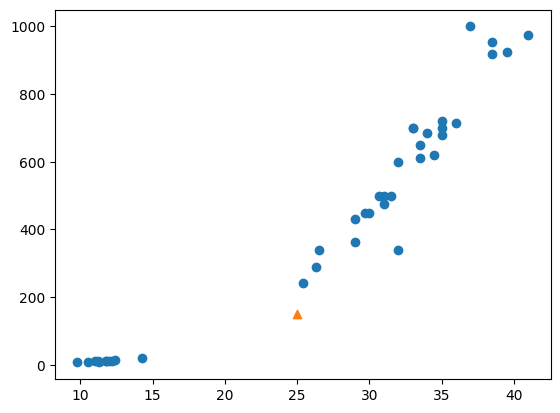

In [41]:
plt.scatter(train_input['Length2'], train_input['Weight'])
plt.scatter(25, 150, marker='^')
plt.show()

In [42]:
distance, indexes = kn.kneighbors([[25, 150]])

/Users/kimminsu/Desktop/DMF/ML/venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [44]:
n_df = train_input.iloc[indexes[0]]

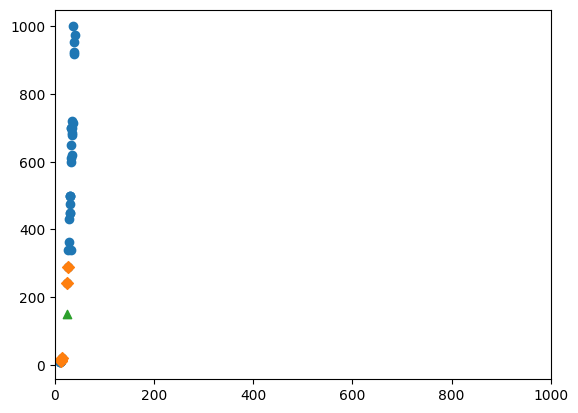

In [46]:
plt.scatter(train_input['Length2'], train_input['Weight'])
plt.scatter(n_df['Length2'], n_df['Weight'], marker='D')
plt.scatter(25, 150, marker='^')
plt.xlim(0, 1000)
plt.show()

- 표준점수

```
(데이터 - 평균) / 표준편차

```

In [53]:
mean = train_input.mean()
std = train_input.std()

In [55]:
train_scaled = ((train_input - mean)/std)

In [56]:
new = ([25, 150] - mean) / std
new

Length2   -0.186044
Weight    -0.886187
dtype: float64

In [57]:
kn.fit(train_scaled, train_target['Species'])

KNeighborsClassifier()

In [58]:
test_scaled = ((test_input - mean)/std)

In [59]:
kn.score(test_scaled, test_target)

1.0

In [60]:
kn.predict([new])

/Users/kimminsu/Desktop/DMF/ML/venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Bream'], dtype=object)

## 펭귄데이터 연습

In [61]:
import seaborn as sns

In [145]:
df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [78]:
df['species'].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

In [146]:
df = df.dropna()

In [80]:
target = df.pop('species')

In [81]:
cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',	'body_mass_g'] 
df_cols = df[cols]

In [102]:
from sklearn.preprocessing import StandardScaler

STD = StandardScaler()
df_cols = STD.fit_transform(df_cols)

In [103]:
x_train, y_train, x_test, y_test = train_test_split(df_cols, target, test_size=0.2, random_state=42)

kn = KNeighborsClassifier(8)
kn.fit(x_train, x_test)

KNeighborsClassifier(n_neighbors=8)

In [104]:
kn.score(y_train, y_test)

1.0

In [147]:
cond = df['species'].isin(['Adelie', 'Gentoo'])

data = df.loc[cond, ['flipper_length_mm', 'body_mass_g']]

In [148]:
target = df.loc[cond, ['species']]

In [149]:
data.head()

,flipper_length_mm,body_mass_g
0,181.0,3750.0
1,186.0,3800.0
2,195.0,3250.0
4,193.0,3450.0
5,190.0,3650.0


In [150]:
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

In [151]:
kn = KNeighborsClassifier()
kn.fit(train_input, train_target['species'])
kn.score(test_input, test_target)

0.9245283018867925

In [152]:
mean = train_input.mean()
std = train_input.std()

In [153]:
train_scaled = ((train_input - mean)/std)

In [154]:
kn.fit(train_scaled, train_target['species'])

KNeighborsClassifier()

In [155]:
test_scaled = ((test_input - mean)/std)

In [156]:
kn.score(test_scaled, test_target)

0.9811320754716981

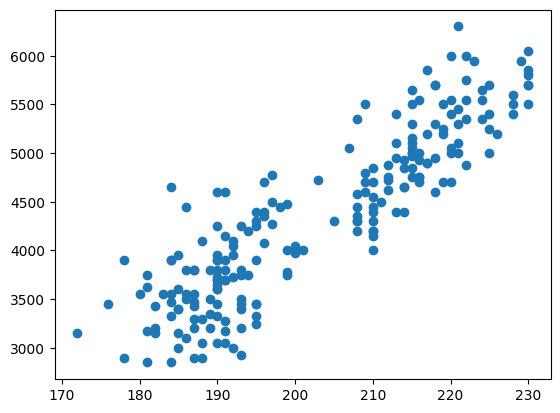

In [158]:
plt.scatter(train_input['flipper_length_mm'], train_input['body_mass_g'])
plt.show()

In [159]:
# teacher

df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [161]:
# 결측치 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [162]:
# 결측치 제거
df = df.dropna()

In [164]:
# 데이터 목록 확인
df['species'].value_counts()

species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64

In [166]:
# 구분의 기준을 확인하여 데이터 선별
df.groupby('species').mean(numeric_only=True)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
species,,,,
Adelie,38.823973,18.347260,190.102740,3706.164384
Chinstrap,48.833824,18.420588,195.823529,3733.088235
Gentoo,47.568067,14.996639,217.235294,5092.436975


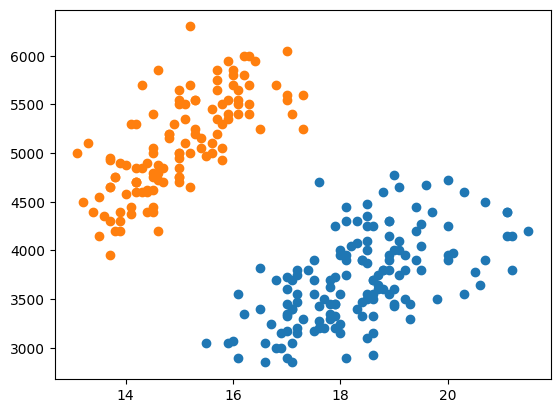

In [171]:
import matplotlib.pyplot as plt

cond_adel = df['species'] == 'Adelie'
cond_chin = df['species'] == 'Chinstrap'
cond_gent = df['species'] == 'Gentoo'

plt.scatter(df.loc[cond_adel, 'bill_depth_mm'], df.loc[cond_adel, 'body_mass_g'])
#plt.scatter(df.loc[cond_chin, 'bill_length_mm'], df.loc[cond_chin, 'body_mass_g'])
plt.scatter(df.loc[cond_gent, 'bill_depth_mm'], df.loc[cond_gent, 'body_mass_g'])

plt.show()

In [173]:
# 선별된 데이터 추출
cond = df['species'].isin(['Adelie', 'Gentoo'])

pg_data = df.loc[cond, ['bill_depth_mm', 'body_mass_g']]

In [174]:
# 타겟 데이터 추출
pg_target = df.loc[cond, ['species']]

In [175]:
# 데이터 분리
train_input, test_input, train_target, test_target= train_test_split(pg_data, pg_target, stratify=pg_target)

In [176]:
# 데이터 학습
kn = KNeighborsClassifier()
kn.fit(train_input, train_target['species'])

KNeighborsClassifier()

In [177]:
kn.score(test_input, test_target['species'])

0.9552238805970149

In [178]:
mean = train_input.mean()
std = train_input.std()

In [180]:
train_scaled = ((train_input - mean)/std)

In [182]:
kn.fit(train_scaled, train_target['species'])

KNeighborsClassifier()

In [183]:
test_scaled = (test_input - mean)/std

In [184]:
kn.score(test_scaled, test_target['species'])

1.0